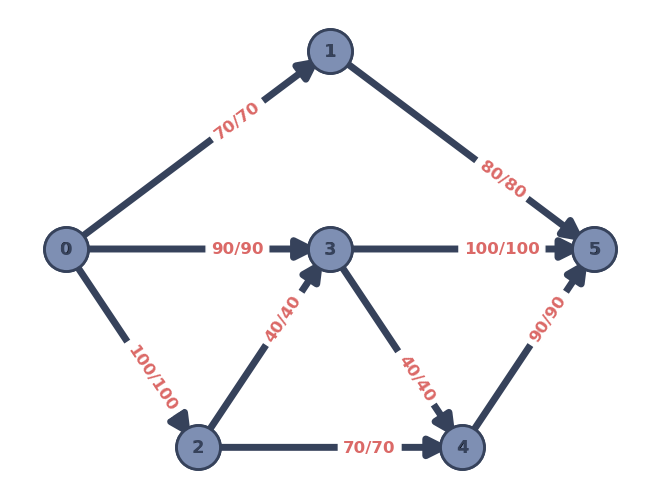

增广路径:
路径 ['0', '1', '5'] , 流量: 70
    0 1 0/70
    0 2 100/100
    0 3 90/90
    1 5 10/80
    2 3 40/40
    2 4 70/70
    3 4 40/40
    3 5 100/100
    4 5 90/90


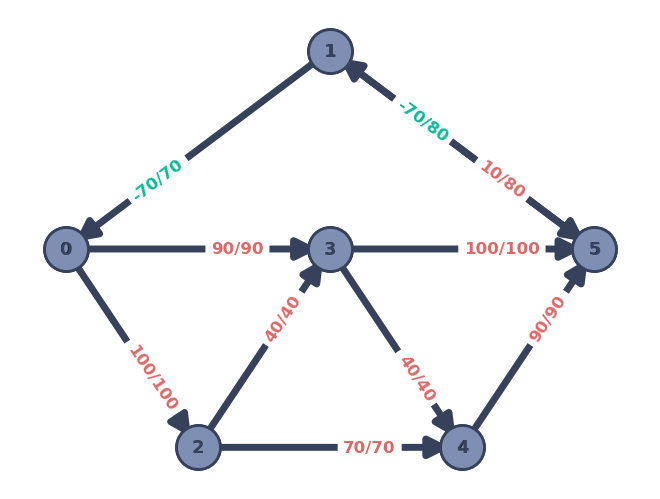

增广路径:
路径 ['0', '2', '3', '4', '5'] , 流量: 40
    0 1 0/70
    0 2 60/100
    0 3 90/90
    1 5 10/80
    2 3 0/40
    2 4 70/70
    3 4 0/40
    3 5 100/100
    4 5 50/90


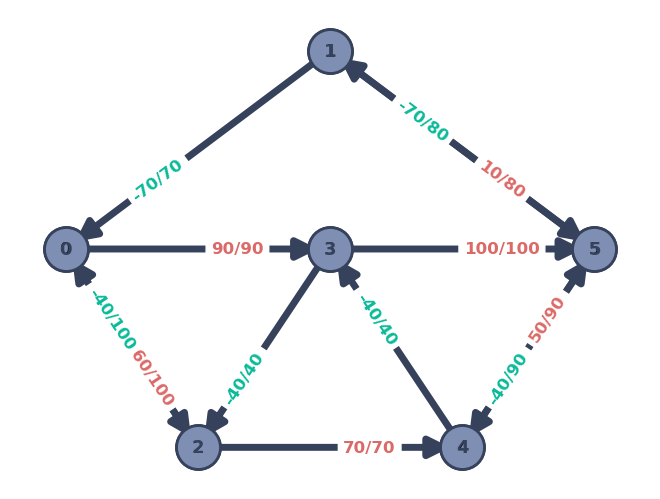

增广路径:
路径 ['0', '2', '4', '3', '5'] , 流量: 40
    0 1 0/70
    0 2 20/100
    0 3 90/90
    1 5 10/80
    2 3 0/40
    2 4 30/70
    3 4 40/40
    3 5 60/100
    4 5 50/90


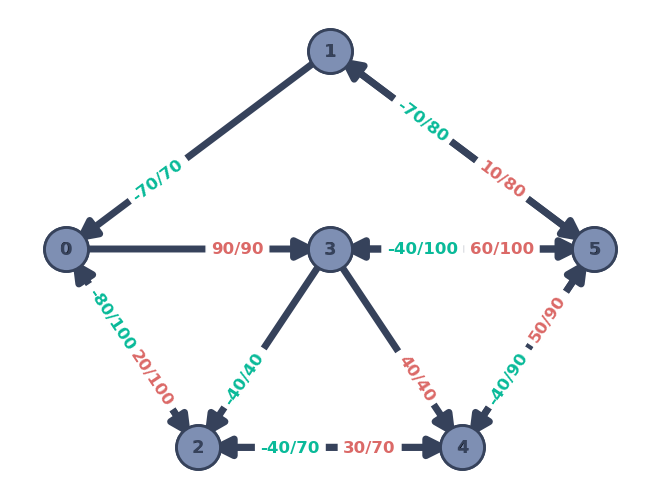

增广路径:
路径 ['0', '2', '4', '5'] , 流量: 20
    0 1 0/70
    0 2 0/100
    0 3 90/90
    1 5 10/80
    2 3 0/40
    2 4 10/70
    3 4 40/40
    3 5 60/100
    4 5 30/90


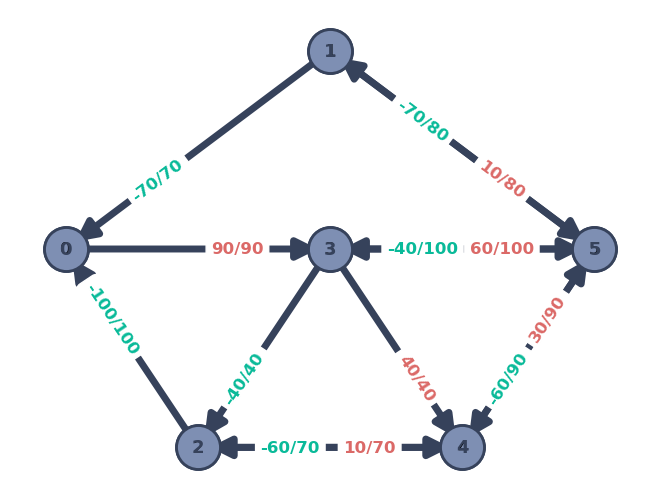

增广路径:
路径 ['0', '3', '2', '4', '5'] , 流量: 10
    0 1 0/70
    0 2 0/100
    0 3 80/90
    1 5 10/80
    2 3 10/40
    2 4 0/70
    3 4 40/40
    3 5 60/100
    4 5 20/90


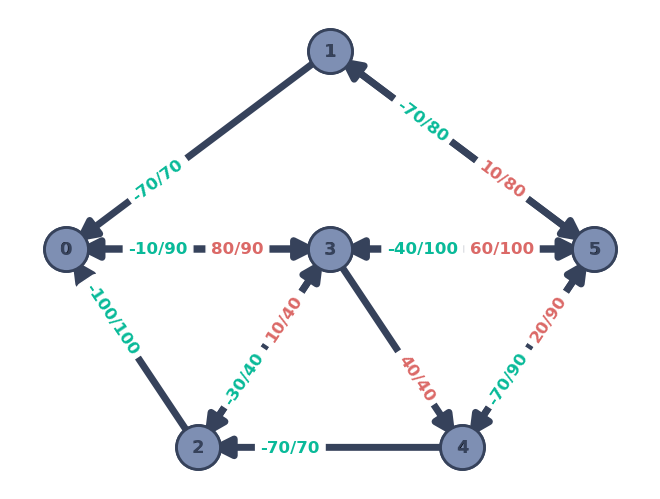

增广路径:
路径 ['0', '3', '4', '5'] , 流量: 20
    0 1 0/70
    0 2 0/100
    0 3 60/90
    1 5 10/80
    2 3 10/40
    2 4 0/70
    3 4 20/40
    3 5 60/100
    4 5 0/90


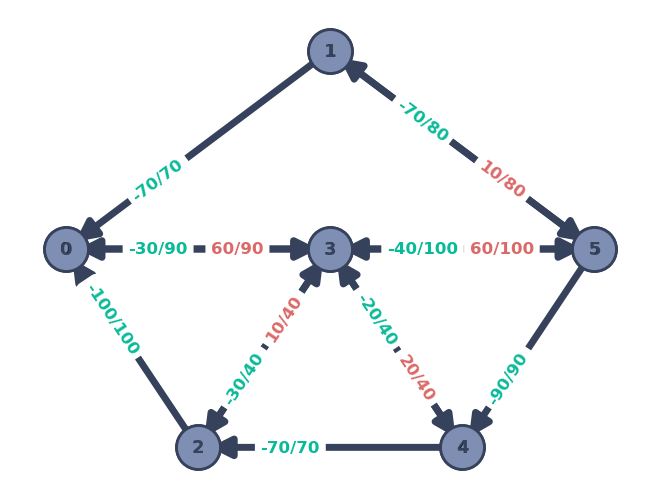

增广路径:
路径 ['0', '3', '5'] , 流量: 60
    0 1 0/70
    0 2 0/100
    0 3 0/90
    1 5 10/80
    2 3 10/40
    2 4 0/70
    3 4 20/40
    3 5 0/100
    4 5 0/90


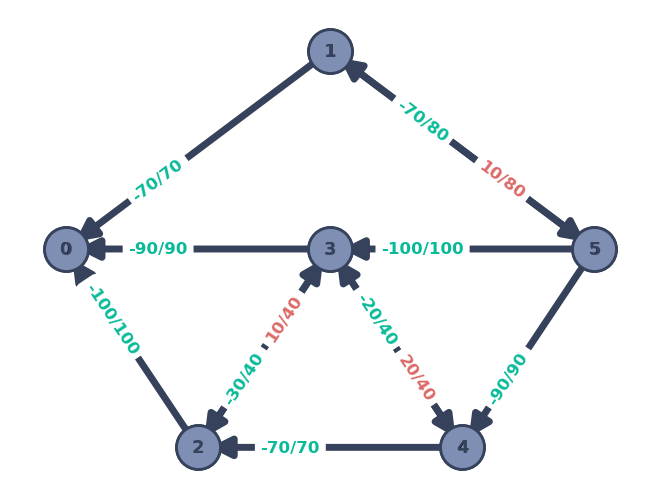

路径 - 1: ['0', '1', '5'] , 流量: 70
路径 - 2: ['0', '2', '3', '4', '5'] , 流量: 40
路径 - 3: ['0', '2', '4', '3', '5'] , 流量: 40
路径 - 4: ['0', '2', '4', '5'] , 流量: 20
路径 - 5: ['0', '3', '2', '4', '5'] , 流量: 10
路径 - 6: ['0', '3', '4', '5'] , 流量: 20
路径 - 7: ['0', '3', '5'] , 流量: 60
MAX: 260


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name, arc_dict):
        self.name = name
        self.arc_dict = arc_dict

def create_node(name, next_list, flow_list):
    return Node(name, {next_node: flow for next_node, flow in zip(next_list, flow_list)})

def Ford_Fulkerson_Solve(s, e, node_list, name_index_dict):
    routes = []
    while True:
        res = dfs(e, [s], None, node_list, name_index_dict)
        if res is None:
            return routes
        routes.append(res)
        route, flow = res
        for i in range(len(route) - 1):
            n1, n2 = node_list[name_index_dict[route[i]]], node_list[name_index_dict[route[i + 1]]]
            if n2.name in n1.arc_dict and n1.arc_dict[n2.name] is not None:
                n1.arc_dict[n2.name] -= flow
            if n1.name in n2.arc_dict and n2.arc_dict[n1.name] is not None:
                n2.arc_dict[n1.name] += flow

        # 输出每次找到增广路时的整个图的信息
        print("增广路径:")
        print(f"路径 {route} , 流量: {flow}")
        for node in node_list:
            for next_node, flow in node.arc_dict.items():
                if test_network[int(node.name)][int(next_node)] != 0:
                    print(f"    {node.name} {next_node} {flow}/{str(test_network[int(node.name)][int(next_node)])}")
        # 绘制完整图
        draw_graph(node_list,test_network)

def dfs(e, cur_route, last_flow, node_list, name_index_dict):
    if cur_route[-1] == e:
        return cur_route, last_flow

    index = name_index_dict[cur_route[-1]]

    for next_node_name, flow in node_list[index].arc_dict.items():
        if next_node_name not in cur_route and (flow is None or flow > 0):
            cur_route.append(next_node_name)
            res = dfs(e, cur_route, min_flow(last_flow, flow), node_list, name_index_dict)
            if res is not None:
                return res
            cur_route.pop(-1)

def min_flow(f1, f2):
    return f2 if f1 is None else f1 if f2 is None else min(f1, f2)

# def draw_graph(node_list, test_network):
#     G = nx.DiGraph()
#     for node in node_list:
#         for next_node, flow in node.arc_dict.items():
#             if flow is not None and flow > 0:
#                 if int(next_node) < int(node.name):
#                     G.add_edge(node.name, next_node, capacity=flow) 
#                 else:
#                     G.add_edge(node.name, next_node, capacity=flow)

#     pos = nx.spring_layout(G)

#     # 手动设置节点位置
#     fixed_positions = {"0": (0, 1), "1": (2, 2), "2": (1, 0), "3": (2, 1), "4": (3, 0), "5": (4, 1)}
#     pos.update(fixed_positions)

#     labels = {}
#     for node in node_list:
#         for next_node, flow in node.arc_dict.items():
#             if flow is not None and flow > 0:
#                 if test_network[int(node.name)][int(next_node)] != 0:
#                     label = f"{flow}/{test_network[int(node.name)][int(next_node)]}"
#                 else:
#                     label = f"{flow}/{test_network[int(next_node)][int(node.name)]}"
#                 labels[(node.name, next_node)] = label
    
#     nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10)
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#     plt.show()
    
def draw_graph(node_list, test_network_c):
    G = nx.DiGraph()
    for node in node_list:
        for next_node, flow in node.arc_dict.items():
            if flow is not None and flow > 0:
                if int(next_node) < int(node.name):
                    G.add_edge(node.name, next_node, capacity=flow) 
                else:
                    G.add_edge(node.name, next_node, capacity=flow)

    pos = nx.spring_layout(G)

    # 手动设置节点位置
    fixed_positions = {"0": (0, 0.5), "1": (1, 1), "2": (0.5, 0), "3": (1, 0.5), "4": (1.5, 0), "5": (2, 0.5)}
    pos.update(fixed_positions)

    labels1 = {}
    labels2 = {}
    for node in node_list:
        for next_node, flow in node.arc_dict.items():
            if flow is not None and flow > 0:
                if test_network_c[int(node.name)][int(next_node)] != 0:
                    label = f"{flow}/{test_network_c[int(node.name)][int(next_node)]}"
                    labels1[(node.name, next_node)] = label
                else:
                    label = f"-{flow}/{test_network_c[int(next_node)][int(node.name)]}"
                    labels2[(node.name, next_node)] = label

    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='#7e8fb3', edgecolors='#36425b', linewidths=2)
    for edge in G.edges():
        nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color='#36425b', width=5, arrowsize=30)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels1, label_pos=0.35, font_color='#db6967', font_size=12, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels2, label_pos=0.35, font_color='#09ba99', font_size=12, font_weight='bold')

    for node, (x, y) in pos.items():
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=1000, node_color='#7e8fb3', edgecolors='#36425b', linewidths=2)
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_weight='bold',font_color='#36425b', font_size=13)

    plt.axis('off')
    plt.show()





test_network = [
    [0, 70, 100, 90, 0, 0],
    [0, 0, 0, 0, 0, 80],
    [0, 0, 0, 40, 70, 0],
    [0, 0, 0, 0, 40, 100],
    [0, 0, 0, 0, 0, 90],
    [0, 0, 0, 0, 0, 0],
]

s, d = 0, 5
allflow = 0
node_list = [create_node(str(i), [str(j) for j in range(len(test_network[i]))], test_network[i]) for i in range(len(test_network))]
name_index_dict = {str(i): i for i in range(len(test_network))}
draw_graph(node_list,test_network)
routes = Ford_Fulkerson_Solve(str(s), str(d), node_list, name_index_dict)
for i, (route, flow) in enumerate(routes):
    print(f"路径 - {i + 1}: {route} , 流量: {flow}")
    allflow += flow
print("MAX: " + str(allflow))
